# **OPEN LIBRARY CASE STUDY**

In [76]:
#import the essential libraries
import pandas as pd
#set the option to display all the columns
pd.set_option("display.max.columns", None)
pd.set_option('display.max_rows', 1000)

In [212]:
#read the json file as a pandas dataframe
library_df = pd.read_json('data.json', lines=True)

In [213]:
#check datset columns and rows count
library_df.shape

(148163, 77)

In [878]:
#list the columns of dataframe with basic info
library_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148163 entries, 0 to 148162
Data columns (total 77 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   latest_revision      148163 non-null  int64  
 1   revision             148163 non-null  int64  
 2   title                146852 non-null  object 
 3   languages            140960 non-null  object 
 4   subjects             97613 non-null   object 
 5   publish_country      132102 non-null  object 
 6   by_statement         106091 non-null  object 
 7   type                 148163 non-null  object 
 8   location             17401 non-null   object 
 9   other_titles         25664 non-null   object 
 10  publishers           136729 non-null  object 
 11  last_modified        148163 non-null  object 
 12  key                  148163 non-null  object 
 13  authors              145622 non-null  object 
 14  publish_places       135581 non-null  object 
 15  oclc_number      

In [77]:
#check for the percentage of Null values in each column
Null_perc=library_df.isnull().mean().mul(100).sort_values(ascending=False)
print(Null_perc)


excerpts               99.999325
isbn_odd_length        99.999325
website                99.999325
fuller_name            99.999325
ia_box_id              99.999325
full_title             99.999325
isbn_invalid           99.997975
ia_loaded_id           99.997300
work_title             99.997300
links                  99.995950
download_url           99.995275
bio                    99.995275
death_date             99.993251
subject_time           99.992576
contributors           99.991901
purchase_url           99.987176
birth_date             99.984477
alternate_names        99.979077
photos                 99.973678
subject_place          99.973003
personal_name          99.967603
uri_descriptions       99.962879
uris                   99.912259
classifications        99.898760
dewey_number           99.896060
copyright_date         99.895385
subject_times          99.848140
subject_people         99.828567
first_sentence         99.793471
name                   99.771198
first_publ

In [879]:
#print the df and familiarize the data
library_df.head(20)

latest_revision  revision  \
0                 2         2   
1                 2         2   
2                 2         2   
3                 2         2   
4                 2         2   
5                 2         2   
6                 2         2   
7                 3         3   
8                 2         2   
9                 2         2   
10                2         2   
11                2         2   
12                2         2   
13                2         2   
14                2         2   
15                2         2   
16                2         2   
17                2         2   
18                2         2   
19                2         2   

                                                title  \
0   The effect of differentiated marking tools and...   
1   Comparison of the nominal grouping and sequenc...   
2                 Professional accident investigation   
3                              I chauceriani scozzesi   
4                      Lezioni zurighesi sul Petrarca   
5              El saber ginecologico del padre Feijoo   
6   Litauische und lettische Drucke des 16. Jahrhu...   
7                           Cancionero de Puerto Rico   
8                                       Reflex French   
9   Some aspects of the relationship between creat...   
10  Creative responses to time in the novels of Wi...   
11  Creativity and delinquency as a function of ph...   
12                                     Shaw and death   
13                             Adventuring with books   
14                                La lune, l'Amérique   
15  Selected and annotated bibliography on the sta...   
16     A resource guide for secondary school teaching   
17  Instructor's resource manual to accompany Mode...   
18                        Stories from Greek history.   
19                              German short stories.   

                      languages  \
0   [{'key': '/languages/eng'}]   
1   [{'key': '/languages/eng'}]   
2   [{'key': '/languages/eng'}]   
3   [{'key': '/languages/ita'}]   
4   [{'key': '/languages/ita'}]   
5   [{'key': '/languages/spa'}]   
6   [{'key': '/languages/ger'}]   
7                           NaN   
8   [{'key': '/languages/eng'}]   
9   [{'key': '/languages/eng'}]   
10  [{'key': '/languages/eng'}]   
11  [{'key': '/languages/eng'}]   
12  [{'key': '/languages/eng'}]   
13  [{'key': '/languages/eng'}]   
14  [{'key': '/languages/fre'}]   
15  [{'key': '/languages/eng'}]   
16  [{'key': '/languages/eng'}]   
17  [{'key': '/languages/eng'}]   
18  [{'key': '/languages/eng'}]   
19  [{'key': '/languages/eng'}]   

                                             subjects publish_country  \
0   [Creative thinking -- Testing, Educational psy...             gau   
1   [Problem solving, Group problem solving, Socia...             lau   
2   [Industrial accidents -- Investigation, Indust...             gau   
3   [English poetry -- Scottish authors, Scottish ...             it    
4                 [Petrarca, Francesco, -- 1304-1374]             it    
5   [Feijóo y Montenegro, Benito Jerónimo, -- 1676...             sp    
6   [Lithuanian language -- History, Latvian langu...             gw    
7   [Folk songs, Spanish, Songs (High voice) with ...             NaN   
8                        [French language -- Grammar]             fr    
9                 [Creative ability, Self-disclosure]             ohu   
10  [Faulkner, William, -- 1897-1962 -- Criticism ...             mdu   
11  [Behaviorism (Psychology), Creative ability, J...             wiu   
12  [Shaw, Bernard, -- 1856-1950 -- Criticism and ...             mdu   
13  [Library science -- Outlines, syllabi, etc, Re...             nyu   
14                                                NaN             ht    
15  [Zionism -- Bibliography, Israel -- Bibliography]             nyu   
16                             [High school teaching]             nyu   
17  [Production planning., Industrial management -...         

In [21]:
#remove spaces from dataset
library_df.columns = library_df.columns.str.strip()

In [880]:
#check different set of datasets
library_df.type.str["key"].unique()

array(['/type/edition', '/type/work', '/type/redirect', '/type/author',
       '/type/delete'], dtype=object)

In [889]:
#check counts  of each dataset
library_df.groupby(library_df.type.str["key"]).size() 

type
/type/author         339
/type/delete         236
/type/edition     143166
/type/redirect       738
/type/work          3684
dtype: int64

In [892]:
#check whats in redirect
library_df[library_df.type.str["key"]=='/type/redirect']

latest_revision  revision title languages subjects publish_country  \
71                    3         3   NaN       NaN      NaN             NaN   
301                   3         3   NaN       NaN      NaN             NaN   
484                   3         3   NaN       NaN      NaN             NaN   
2288                  3         3   NaN       NaN      NaN             NaN   
4970                  3         3   NaN       NaN      NaN             NaN   
5818                  3         3   NaN       NaN      NaN             NaN   
6060                  3         3   NaN       NaN      NaN             NaN   
7435                  3         3   NaN       NaN      NaN             NaN   
7652                  3         3   NaN       NaN      NaN             NaN   
7922                  3         3   NaN       NaN      NaN             NaN   
8438                  3         3   NaN       NaN      NaN             NaN   
8894                  3         3   NaN       NaN      NaN             NaN   
9320                  3         3   NaN       NaN      NaN             NaN   
9469                  3         3   NaN       NaN      NaN             NaN   
9850                  2         2   NaN       NaN      NaN             NaN   
9873                  2         2   NaN       NaN      NaN             NaN   
9894                  2         2   NaN       NaN      NaN             NaN   
9909                  2         2   NaN       NaN      NaN             NaN   
9916                  2         2   NaN       NaN      NaN             NaN   
9943                  2         2   NaN       NaN      NaN             NaN   
9969                  2         2   NaN       NaN      NaN             NaN   
9989                  2         2   NaN       NaN      NaN             NaN   
10007                 2         2   NaN       NaN      NaN             NaN   
10016                 2         2   NaN       NaN      NaN             NaN   
10017                 2         2   NaN       NaN      NaN             NaN   
10040                 2         2   NaN       NaN      NaN             NaN   
10061                 2         2   NaN       NaN      NaN             NaN   
10062                 2         2   NaN       NaN      NaN             NaN   
10082                 2         2   NaN       NaN      NaN             NaN   
10090                 2         2   NaN       NaN      NaN             NaN   
10098                 3         3   NaN       NaN      NaN             NaN   
10113                 2         2   NaN       NaN      NaN             NaN   
10151                 2         2   NaN       NaN      NaN             NaN   
10166                 2         2   NaN       NaN      NaN             NaN   
10167                 2         2   NaN       NaN      NaN             NaN   
10180                 2         2   NaN       NaN      NaN             NaN   
10200                 2         2   NaN       NaN      NaN             NaN   
10201                 2         2   NaN       NaN      NaN             NaN   
10238                 2         2   NaN       NaN      NaN             NaN   
10239                 2         2   NaN       NaN      NaN             NaN   
10246                 2         2   NaN       NaN      NaN             NaN   
10285                 3         3   NaN       NaN      NaN             NaN   
10351                 2         2   NaN       NaN      NaN             NaN   
10364                 2         2   NaN       NaN      NaN             NaN   
10371                 2         2   NaN       NaN      NaN             NaN   
10405                 2         2   NaN       NaN      NaN             NaN   
10413                 2         2   NaN       NaN      NaN             NaN   
10414                 2         2   NaN       NaN      NaN             NaN   
10422                 2         2   NaN       NaN      NaN             NaN   
10444                 2         2   NaN       NaN      NaN             NaN   
10610                 2       

In [893]:
#check whats in delete
library_df[library_df.type.str["key"]=='/type/delete']

latest_revision  revision title languages subjects publish_country  \
3126                  3         3   NaN       NaN      NaN             NaN   
4711                  3         3   NaN       NaN      NaN             NaN   
7470                  3         3   NaN       NaN      NaN             NaN   
7669                  3         3   NaN       NaN      NaN             NaN   
8304                  3         3   NaN       NaN      NaN             NaN   
9060                  3         3   NaN       NaN      NaN             NaN   
9296                  3         3   NaN       NaN      NaN             NaN   
10536                 3         3   NaN       NaN      NaN             NaN   
10694                 3         3   NaN       NaN      NaN             NaN   
11775                 3         3   NaN       NaN      NaN             NaN   
12151                 3         3   NaN       NaN      NaN             NaN   
12315                 3         3   NaN       NaN      NaN             NaN   
12366                 3         3   NaN       NaN      NaN             NaN   
12911                 3         3   NaN       NaN      NaN             NaN   
12962                 3         3   NaN       NaN      NaN             NaN   
13312                 3         3   NaN       NaN      NaN             NaN   
13518                 3         3   NaN       NaN      NaN             NaN   
13708                 3         3   NaN       NaN      NaN             NaN   
14132                 3         3   NaN       NaN      NaN             NaN   
14802                 3         3   NaN       NaN      NaN             NaN   
14811                 3         3   NaN       NaN      NaN             NaN   
15338                 3         3   NaN       NaN      NaN             NaN   
16515                 3         3   NaN       NaN      NaN             NaN   
16761                 3         3   NaN       NaN      NaN             NaN   
17480                 3         3   NaN       NaN      NaN             NaN   
17772                 3         3   NaN       NaN      NaN             NaN   
18897                 3         3   NaN       NaN      NaN             NaN   
21088                 3         3   NaN       NaN      NaN             NaN   
21888                 3         3   NaN       NaN      NaN             NaN   
22084                 3         3   NaN       NaN      NaN             NaN   
25801                 3         3   NaN       NaN      NaN             NaN   
25952                 3         3   NaN       NaN      NaN             NaN   
26487                 3         3   NaN       NaN      NaN             NaN   
28994                 3         3   NaN       NaN      NaN             NaN   
30044                 3         3   NaN       NaN      NaN             NaN   
32247                 3         3   NaN       NaN      NaN             NaN   
42578                 3         3   NaN       NaN      NaN             NaN   
42639                 3         3   NaN       NaN      NaN             NaN   
42981                 3         3   NaN       NaN      NaN             NaN   
43038                 3         3   NaN       NaN      NaN             NaN   
43291                 3         3   NaN       NaN      NaN             NaN   
43818                 3         3   NaN       NaN      NaN             NaN   
44782                 3         3   NaN       NaN      NaN             NaN   
45636                 3         3   NaN       NaN      NaN             NaN   
46032                 3         3   NaN       NaN      NaN             NaN   
46838                 3         3   NaN       NaN      NaN             NaN   
47005                 3         3   NaN       NaN      NaN             NaN   
47167                 3         3   NaN       NaN      NaN             NaN   
47203                 3         3   NaN       NaN      NaN             NaN   
47334                 3         3   NaN       NaN      NaN             NaN   
47376                 3       

# **Creation of Authors Dataframe Begins**

In [898]:
#create authors dataframe
authors_df=library_df[library_df.type.str["key"]=='/type/author']

In [899]:
#print authors dataframe
authors_df.head()

latest_revision  revision title languages subjects publish_country  \
516                 1         1   NaN       NaN      NaN             NaN   
795                 3         3   NaN       NaN      NaN             NaN   
818                 2         2   NaN       NaN      NaN             NaN   
2083                4         4   NaN       NaN      NaN             NaN   
2201                1         1   NaN       NaN      NaN             NaN   

     by_statement                     type location other_titles publishers  \
516           NaN  {'key': '/type/author'}      NaN          NaN        NaN   
795           NaN  {'key': '/type/author'}      NaN          NaN        NaN   
818           NaN  {'key': '/type/author'}      NaN          NaN        NaN   
2083          NaN  {'key': '/type/author'}      NaN          NaN        NaN   
2201          NaN  {'key': '/type/author'}      NaN          NaN        NaN   

                                          last_modified                  key  \
516   {'type': '/type/datetime', 'value': '2015-11-0...  /authors/OL7264373A   
795   {'type': '/type/datetime', 'value': '2012-05-1...    /authors/OL27008A   
818   {'type': '/type/datetime', 'value': '2012-05-1...  /authors/OL5534875A   
2083  {'type': '/type/datetime', 'value': '2012-05-1...  /authors/OL2865539A   
2201  {'type': '/type/datetime', 'value': '2015-11-0...  /authors/OL7264377A   

     authors publish_places oclc_number pagination  \
516      NaN            NaN         NaN        NaN   
795      NaN            NaN         NaN        NaN   
818      NaN            NaN         NaN        NaN   
2083     NaN            NaN         NaN        NaN   
2201     NaN            NaN         NaN        NaN   

                                                created notes  \
516   {'type': '/type/datetime', 'value': '2015-11-0...   NaN   
795   {'type': '/type/datetime', 'value': '2008-04-0...   NaN   
818   {'type': '/type/datetime', 'value': '2008-10-1...   NaN   
2083  {'type': '/type/datetime', 'value': '2008-04-2...   NaN   
2201  {'type': '/type/datetime', 'value': '2015-11-0...   NaN   

      number_of_pages publish_date works subtitle series contributions genres  \
516               NaN          NaN   NaN      NaN    NaN           NaN    NaN   
795               NaN          NaN   NaN      NaN    NaN           NaN    NaN   
818               NaN          NaN   NaN      NaN    NaN           NaN    NaN   
2083              NaN          NaN   NaN      NaN    NaN           NaN    NaN   
2201              NaN          NaN   NaN      NaN    NaN           NaN    NaN   

     table_of_contents lc_classifications subject_places first_publish_date  \
516                NaN                NaN            NaN                NaN   
795                NaN                NaN            NaN                NaN   
818                NaN                NaN            NaN                NaN   
2083               NaN                NaN            NaN                NaN   
2201               NaN                NaN            NaN                NaN   

     edition_name isbn_10 dewey_decimal_class lccn identifiers weight  \
516           NaN     NaN                 NaN  NaN         NaN    NaN   
795           NaN     NaN                 NaN  NaN         NaN    NaN   
818           NaN     NaN                 NaN  NaN         NaN    NaN   
2083          NaN     NaN                 NaN  NaN         NaN    NaN   
2201          NaN     NaN                 NaN  NaN         NaN    NaN   

     physical_format covers isbn_13 physical_dimensions uri_descriptions uris  \
516              NaN    NaN     NaN                 NaN              NaN  NaN   
795              NaN    NaN     NaN                 NaN              NaN  NaN   
818              NaN    NaN     NaN                 NaN              NaN  NaN   
2083             NaN    NaN     NaN                 NaN              NaN  NaN   
2201             NaN    NaN     NaN                 NaN              Na

In [900]:
# authors dataframe size
authors_df.shape

(339, 77)

In [229]:
#check if duplicates in authors dataframe
authors_df[authors_df.duplicated('key')].sort_values(by=['key'])

latest_revision  revision title languages subjects publish_country  \
8938                 4         4   NaN       NaN      NaN             NaN   
3001                 6         6   NaN       NaN      NaN             NaN   
27152                4         4   NaN       NaN      NaN             NaN   
27162                5         5   NaN       NaN      NaN             NaN   
27224                6         6   NaN       NaN      NaN             NaN   
27264                7         7   NaN       NaN      NaN             NaN   
90201                4         4   NaN       NaN      NaN             NaN   

      by_statement                     type location other_titles publishers  \
8938           NaN  {'key': '/type/author'}      NaN          NaN        NaN   
3001           NaN  {'key': '/type/author'}      NaN          NaN        NaN   
27152          NaN  {'key': '/type/author'}      NaN          NaN        NaN   
27162          NaN  {'key': '/type/author'}      NaN          NaN        NaN   
27224          NaN  {'key': '/type/author'}      NaN          NaN        NaN   
27264          NaN  {'key': '/type/author'}      NaN          NaN        NaN   
90201          NaN  {'key': '/type/author'}      NaN          NaN        NaN   

                                           last_modified                  key  \
8938   {'type': '/type/datetime', 'value': '2012-05-1...  /authors/OL2308766A   
3001   {'type': '/type/datetime', 'value': '2012-05-1...  /authors/OL2865539A   
27152  {'type': '/type/datetime', 'value': '2012-05-1...  /authors/OL3184959A   
27162  {'type': '/type/datetime', 'value': '2012-05-1...  /authors/OL3184959A   
27224  {'type': '/type/datetime', 'value': '2012-05-1...  /authors/OL3184959A   
27264  {'type': '/type/datetime', 'value': '2012-05-1...  /authors/OL3184959A   
90201  {'type': '/type/datetime', 'value': '2012-05-1...  /authors/OL4369909A   

      authors publish_places oclc_number pagination  \
8938      NaN            NaN         NaN        NaN   
3001      NaN            NaN         NaN        NaN   
27152     NaN            NaN         NaN        NaN   
27162     NaN            NaN         NaN        NaN   
27224     NaN            NaN         NaN        NaN   
27264     NaN            NaN         NaN        NaN   
90201     NaN            NaN         NaN        NaN   

                                                 created notes  \
8938   {'type': '/type/datetime', 'value': '2008-04-0...   NaN   
3001   {'type': '/type/datetime', 'value': '2008-04-2...   NaN   
27152  {'type': '/type/datetime', 'value': '2008-04-3...   NaN   
27162  {'type': '/type/datetime', 'value': '2008-04-3...   NaN   
27224  {'type': '/type/datetime', 'value': '2008-04-3...   NaN   
27264  {'type': '/type/datetime', 'value': '2008-04-3...   NaN   
90201  {'type': '/type/datetime', 'value': '2008-08-3...   NaN   

       number_of_pages publish_date works subtitle series contributions  \
8938               NaN          NaN   NaN      NaN    NaN           NaN   
3001               NaN          NaN   NaN      NaN    NaN           NaN   
27152              NaN          NaN   NaN      NaN    NaN           NaN   
27162              NaN          NaN   NaN      NaN    NaN           NaN   
27224              NaN          NaN   NaN      NaN    NaN           NaN   
27264              NaN          NaN   NaN      NaN    NaN           NaN   
90201              NaN          NaN   NaN      NaN    NaN           NaN   

      genres table_of_contents lc_classifications subject_places  \
8938     NaN               NaN                NaN            NaN   
3001     NaN               NaN                NaN            NaN   
27152    NaN               NaN                NaN            NaN   
27162    NaN               NaN                NaN            NaN   
27224    NaN               NaN                NaN            NaN   
27264    NaN               NaN                NaN            NaN   
90201    NaN               NaN                NaN    

In [902]:
#create authors duplicate count
authors_df[authors_df.duplicated('key')].sort_values(by=['key']).shape

(7, 77)

In [901]:
#check for sample duplicate
authors_df[authors_df.key=='/authors/OL2308766A']

latest_revision  revision title languages subjects publish_country  \
8870                3         3   NaN       NaN      NaN             NaN   
8938                4         4   NaN       NaN      NaN             NaN   

     by_statement                     type location other_titles publishers  \
8870          NaN  {'key': '/type/author'}      NaN          NaN        NaN   
8938          NaN  {'key': '/type/author'}      NaN          NaN        NaN   

                                          last_modified                  key  \
8870  {'type': '/type/datetime', 'value': '2012-05-1...  /authors/OL2308766A   
8938  {'type': '/type/datetime', 'value': '2012-05-1...  /authors/OL2308766A   

     authors publish_places oclc_number pagination  \
8870     NaN            NaN         NaN        NaN   
8938     NaN            NaN         NaN        NaN   

                                                created notes  \
8870  {'type': '/type/datetime', 'value': '2008-04-0...   NaN   
8938  {'type': '/type/datetime', 'value': '2008-04-0...   NaN   

      number_of_pages publish_date works subtitle series contributions genres  \
8870              NaN          NaN   NaN      NaN    NaN           NaN    NaN   
8938              NaN          NaN   NaN      NaN    NaN           NaN    NaN   

     table_of_contents lc_classifications subject_places first_publish_date  \
8870               NaN                NaN            NaN                NaN   
8938               NaN                NaN            NaN                NaN   

     edition_name isbn_10 dewey_decimal_class lccn identifiers weight  \
8870          NaN     NaN                 NaN  NaN         NaN    NaN   
8938          NaN     NaN                 NaN  NaN         NaN    NaN   

     physical_format covers isbn_13 physical_dimensions uri_descriptions uris  \
8870             NaN    NaN     NaN                 NaN              NaN  NaN   
8938             NaN    NaN     NaN                 NaN              NaN  NaN   

      url source_records first_sentence work_titles description subject_times  \
8870  NaN            NaN            NaN         NaN         NaN           NaN   
8938  NaN            NaN            NaN         NaN         NaN           NaN   

     ocaid download_url dewey_number             name subject_place  \
8870   NaN          NaN          NaN  John Lord Bacon           NaN   
8938   NaN          NaN          NaN  John Lord Bacon           NaN   

     subject_people    personal_name alternate_names     photos oclc_numbers  \
8870            NaN  John Lord Bacon             NaN        NaN          NaN   
8938            NaN  John Lord Bacon             NaN  [7118379]          NaN   

     copyright_date classifications birth_date  bio links title_prefix  \
8870            NaN             NaN       1878  NaN   NaN          NaN   
8938            NaN             NaN       1878  NaN   NaN          NaN   

     death_date subject_time work_title contributors purchase_url fuller_name  \
8870       1961          NaN        NaN          NaN          NaN         NaN   
8938       1961          NaN        NaN          NaN          NaN         NaN   

     website isbn_invalid ia_loaded_id isbn_odd_length ia_box_id full_title  \
8870     NaN          NaN          NaN             NaN       NaN        NaN   
8938     NaN          NaN          NaN             NaN       NaN        NaN   

     excerpts  
8870      NaN  
8938      NaN

In [903]:
#drop duplicates based on revision number
authors_df=authors_df.sort_values('revision', ascending=False).drop_duplicates('key').sort_index()


In [904]:
#check counts after dropping duplicates
authors_df.shape

(332, 77)

In [905]:
#create new authors dataframe with selected column
authors_df=authors_df[["key","name","personal_name","alternate_names","uris","bio","location","birth_date","death_date","links"]].reset_index(drop=True)

In [906]:
#print new authors dataframe
authors_df.head()

key                          name      personal_name  \
0  /authors/OL7264373A     캐시랜드↕＼＼UCC124。COM＼＼㈜카지노추천                NaN   
1    /authors/OL27008A                Earlene Fowler     Earlene Fowler   
2  /authors/OL5534875A             Sadhu Singh Dhami  Sadhu Singh Dhami   
3  /authors/OL7264377A  합법카지노■＼＼UCC124。COM＼＼▽아베크롬비후드                NaN   
4  /authors/OL7123974A                  Alasia Pugno                NaN   

                    alternate_names uris  bio location birth_date death_date  \
0                               NaN  NaN  NaN      NaN        NaN        NaN   
1  [EARLENE FOWLER, FOWLER EARLENE]  NaN  NaN      NaN        NaN        NaN   
2                               NaN  NaN  NaN      NaN        NaN        NaN   
3                               NaN  NaN  NaN      NaN        NaN        NaN   
4                               NaN  NaN  NaN      NaN        NaN        NaN   

  links  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN

In [907]:
#check for Nulls in authors dataframe
authors_df.isnull().mean().mul(100).sort_values(ascending=False)

uris               100.000000
location            99.698795
links               99.397590
bio                 97.891566
death_date          97.590361
birth_date          95.180723
alternate_names     92.168675
personal_name       87.650602
key                  0.000000
name                 0.000000
dtype: float64

In [1103]:
#create authors dataframe with selected fields
authors_df=authors_df[["key","name","personal_name"]].reset_index(drop=True)

# **Creation of Works Dataframe Begins**

In [1107]:
#create works dataframe and check count

works_df=library_df[library_df.type.str["key"]=='/type/work']
works_df.shape

(3684, 77)

In [934]:
#check number of duplicates
works_df[works_df.duplicated('key')].sort_values(by=['key']).shape

(189, 77)

In [1108]:
#remove duplicates and check count
works_df=works_df.sort_values('revision', ascending=False).drop_duplicates('key').sort_index()
works_df.shape

(3495, 77)

In [937]:
#create new works dataframe with selected columns
works_df=works_df[["key","title","subtitle","authors","subjects","subject_places","subject_times","subject_people","description","dewey_number","lc_classifications","first_sentence","other_titles","first_publish_date","links","notes","covers"]]

In [938]:
#check Nulls in works dataframe
works_df.isnull().mean().mul(100).sort_values(ascending=False)

notes                 100.000000
other_titles          100.000000
links                  99.914163
first_sentence         99.885551
description            99.370529
subtitle               99.084406
dewey_number           95.593705
subject_times          93.590844
subject_people         92.732475
lc_classifications     90.185980
first_publish_date     79.885551
covers                 78.798283
subject_places         68.669528
subjects               29.585122
authors                 0.314735
title                   0.000000
key                     0.000000
dtype: float64

In [939]:
#print new works dataframe with selected columns
works_df.head()

key                                              title  \
7    /works/OL12268504W                          Cancionero de Puerto Rico   
70   /works/OL11020057W               Un audacieux message, l'Encyclopédie   
87    /works/OL1497161W                                        Great Benin   
103   /works/OL1871369W                                     Sexual healing   
127  /works/OL12268463W  DEFINING THE TERM "NURSE LEADER" THROUGH USE O...   

    subtitle                                            authors  \
7        NaN  [{'type': {'key': '/type/author_role'}, 'autho...   
70       NaN  [{'type': {'key': '/type/author_role'}, 'autho...   
87       NaN  [{'type': {'key': '/type/author_role'}, 'autho...   
103      NaN  [{'type': {'key': '/type/author_role'}, 'autho...   
127      NaN  [{'type': {'key': '/type/author_role'}, 'autho...   

                                              subjects  \
7    [Folk songs, Spanish, Songs (High voice) with ...   
70                                      [Encyclopédie]   
87                     [Art, Primitive, Primitive Art]   
103  [Health aspects, Health aspects of Intimacy (P...   
127  [Health Sciences, Nursing, Nursing Health Scie...   

             subject_places subject_times subject_people description  \
7             [Puerto Rico]           NaN            NaN         NaN   
70                      NaN           NaN            NaN         NaN   
87   [Benin City (Nigeria)]           NaN            NaN         NaN   
103                     NaN           NaN            NaN         NaN   
127                     NaN           NaN            NaN         NaN   

    dewey_number    lc_classifications  \
7            NaN  [M1621.F47 C35 1954]   
70           NaN                   NaN   
87           NaN          [DT515 .R84]   
103          NaN                   NaN   
127          NaN                   NaN   

                                        first_sentence other_titles  \
7                                                  NaN          NaN   
70                                                 NaN          NaN   
87                                                 NaN          NaN   
103  {'type': '/type/text', 'value': 'Having a sexu...          NaN   
127                                                NaN          NaN   

    first_publish_date links notes     covers  
7                 1954   NaN   NaN        NaN  
70                 NaN   NaN   NaN        NaN  
87                1903   NaN   NaN        NaN  
103               1990   NaN   NaN  [3846950]  
127               1991   NaN   NaN        NaN

In [964]:
#create new works dataframe after eliminating columns
works_df=works_df[["key","title","subtitle","authors"]].reset_index(drop=True)

In [967]:
#explode author columns
works_df=works_df.explode("authors")

In [968]:
#create author_key column,9c v
works_df["author_key"]=works_df.authors.str["author"].str["key"]

In [970]:
#new works dataframe 
works_df.head()

key                                              title  \
0  /works/OL12268504W                          Cancionero de Puerto Rico   
1  /works/OL11020057W               Un audacieux message, l'Encyclopédie   
2   /works/OL1497161W                                        Great Benin   
3   /works/OL1871369W                                     Sexual healing   
4  /works/OL12268463W  DEFINING THE TERM "NURSE LEADER" THROUGH USE O...   

  subtitle                                            authors  \
0      NaN  {'type': {'key': '/type/author_role'}, 'author...   
1      NaN  {'type': {'key': '/type/author_role'}, 'author...   
2      NaN  {'type': {'key': '/type/author_role'}, 'author...   
3      NaN  {'type': {'key': '/type/author_role'}, 'author...   
4      NaN  {'type': {'key': '/type/author_role'}, 'author...   

            author_key  
0  /authors/OL5360212A  
1  /authors/OL4588068A  
2   /authors/OL159627A  
3   /authors/OL224058A  
4  /authors/OL5360174A

In [971]:
#new works dataframe count
works_df.shape

(3565, 5)

In [972]:
#check duplicated values in new works dataframe 
works_df[works_df.duplicated('key')]


key                                              title  \
74    /works/OL16631322W                              Georama. Volume 3A-3B   
74    /works/OL16631322W                              Georama. Volume 3A-3B   
80    /works/OL16631323W  Corso modulare di costruzioni. Per le Scuole s...   
89    /works/OL16631324W     Matematica uno. Per il Liceo scientifico vol.1   
89    /works/OL16631324W     Matematica uno. Per il Liceo scientifico vol.1   
102   /works/OL16631327W  Fare e ragionare con la matematica- aritmetica...   
108   /works/OL16631328W                           Dit. Disegno + 24 tavole   
126   /works/OL16631330W  Words that speak. Literature in time. Con espa...   
126   /works/OL16631330W  Words that speak. Literature in time. Con espa...   
140   /works/OL16631340W  Bibliotecatre. Volume 1A-1B-C. Con quaderno di...   
172    /works/OL7919395W  Living Books Arthur's Computer Adventure By Ma...   
530   /works/OL16631209W                                     Allies divided   
542   /works/OL16631200W                                            Motgift   
542   /works/OL16631200W                                            Motgift   
542   /works/OL16631200W                                            Motgift   
542   /works/OL16631200W                                            Motgift   
542   /works/OL16631200W                                            Motgift   
542   /works/OL16631200W                                            Motgift   
542   /works/OL16631200W                                            Motgift   
542   /works/OL16631200W                                            Motgift   
542   /works/OL16631200W                                            Motgift   
542   /works/OL16631200W                                            Motgift   
542   /works/OL16631200W                                            Motgift   
542   /works/OL16631200W                                            Motgift   
542   /works/OL16631200W                                            Motgift   
542   /works/OL16631200W                                            Motgift   
542   /works/OL16631200W                                            Motgift   
542   /works/OL16631200W                                            Motgift   
542   /works/OL16631200W                                            Motgift   
542   /works/OL16631200W                                            Motgift   
542   /works/OL16631200W                                            Motgift   
542   /works/OL16631200W                                            Motgift   
615   /works/OL16631425W  Il nuovo mosaico e gli specchi. Con espansione...   
631   /works/OL16631428W  Multi ForMat. Moduli per la formazione matemat...   
642   /works/OL16631410W              Multiformat compact - algebra 1 vol.1   
673   /works/OL16631441W                                  Visual basic 2010   
774   /works/OL16621324W                              Pratiche innominabili   
774   /works/OL16621324W                              Pratiche innominabili   
1117  /works/OL16631408W  Trame del testo e dell'immaginario. Con espans...   
1117  /works/OL16631408W  Trame del testo e dell'immaginario. Con espans...   
1132  /works/OL16631409W  Il sale della terra. Con espansione online. Pe...   
1146  /works/OL16631309W                           Viaggio nella matematica   
1158  /works/OL16631417W  Come il sole. Corso di religione cattolica. Pe...   
1444  /works/OL16632143W                The Picnic at Apple Park [big book]   
1573  /works/OL16633948W                          Drama and cultural change   
1579  /works/OL16634207W                                        Ultravision   
1582  /works/OL16634392W  Ontologies and semantic technologies for intel...   
1582  /works/OL16634392W  Ontologies and semantic technologies for intel...   
1587  /works/OL16634401W                                       Oral biology   
1587  /works/OL16634401W                                       Oral bio

In [973]:
#check sample duplicated record in new works dataframe 
works_df[works_df.key=='/works/OL16631323W']

key                                              title  \
80  /works/OL16631323W  Corso modulare di costruzioni. Per le Scuole s...   
80  /works/OL16631323W  Corso modulare di costruzioni. Per le Scuole s...   

   subtitle                                            authors  \
80      NaN  {'type': {'key': '/type/author_role'}, 'author...   
80      NaN  {'type': {'key': '/type/author_role'}, 'author...   

             author_key  
80  /authors/OL7123980A  
80  /authors/OL7123981A

In [974]:
#drop authors column
works_df=works_df.drop("authors",1)

In [975]:
#new works dataframe 
works_df.head()

key                                              title  \
0  /works/OL12268504W                          Cancionero de Puerto Rico   
1  /works/OL11020057W               Un audacieux message, l'Encyclopédie   
2   /works/OL1497161W                                        Great Benin   
3   /works/OL1871369W                                     Sexual healing   
4  /works/OL12268463W  DEFINING THE TERM "NURSE LEADER" THROUGH USE O...   

  subtitle           author_key  
0      NaN  /authors/OL5360212A  
1      NaN  /authors/OL4588068A  
2      NaN   /authors/OL159627A  
3      NaN   /authors/OL224058A  
4      NaN  /authors/OL5360174A

# **Creation of Edition Dataframe Begins**

In [ ]:
#Created edition dataframe
editions_df=library_df[library_df.type.str["key"]=='/type/edition']

In [981]:
#count of edition dataframe
editions_df.shape

(143166, 77)

In [982]:
#check for duplicates
editions_df[editions_df.duplicated('key')].shape


(265, 77)

In [983]:
#remove duplicates
editions_df=editions_df.sort_values('revision', ascending=False).drop_duplicates('key').sort_index()

In [984]:
#new dataframe count
editions_df.shape

(142901, 77)

In [985]:
#new dataframe dispaly
editions_df.head()

latest_revision  revision  \
0                2         2   
1                2         2   
2                2         2   
3                2         2   
4                2         2   

                                               title  \
0  The effect of differentiated marking tools and...   
1  Comparison of the nominal grouping and sequenc...   
2                Professional accident investigation   
3                             I chauceriani scozzesi   
4                     Lezioni zurighesi sul Petrarca   

                     languages  \
0  [{'key': '/languages/eng'}]   
1  [{'key': '/languages/eng'}]   
2  [{'key': '/languages/eng'}]   
3  [{'key': '/languages/ita'}]   
4  [{'key': '/languages/ita'}]   

                                            subjects publish_country  \
0  [Creative thinking -- Testing, Educational psy...             gau   
1  [Problem solving, Group problem solving, Socia...             lau   
2  [Industrial accidents -- Investigation, Indust...             gau   
3  [English poetry -- Scottish authors, Scottish ...             it    
4                [Petrarca, Francesco, -- 1304-1374]             it    

                                        by_statement  \
0                             by Lillian Rose Arnold   
1                             by Walter Edward Stead   
2                              by Raymond L. Kuhlman   
3                             a cura di Sergio Rossi   
4  Francesco de Sanctis ; a cura di Sergio Romagnoli   

                       type location                             other_titles  \
0  {'key': '/type/edition'}   [NBuC]  [Marking tools, Motivational treatment]   
1  {'key': '/type/edition'}   [NBuC]                                      NaN   
2  {'key': '/type/edition'}   [NBuC]                                      NaN   
3  {'key': '/type/edition'}   [NBuC]                                      NaN   
4  {'key': '/type/edition'}   [NBuC]                                      NaN   

                         publishers  \
0           [University of Georgia]   
1      [Louisiana State University]   
2                 [Institute Press]   
3  [Edizioni Scientifiche Italiane]   
4                [Liviana Editrice]   

                                       last_modified                 key  \
0  {'type': '/type/datetime', 'value': '2009-12-1...  /books/OL22783906M   
1  {'type': '/type/datetime', 'value': '2009-12-1...  /books/OL22783907M   
2  {'type': '/type/datetime', 'value': '2009-12-1...  /books/OL22783908M   
3  {'type': '/type/datetime', 'value': '2009-12-1...  /books/OL22783909M   
4  {'type': '/type/datetime', 'value': '2009-12-1...  /books/OL22783911M   

                            authors    publish_places oclc_number  \
0  [{'key': '/authors/OL6535896A'}]          [Athens]   [3954579]   
1  [{'key': '/authors/OL6535897A'}]     [Baton Rouge]   [3954635]   
2  [{'key': '/authors/OL6535898A'}]  [Loganville, Ga]   [3955196]   
3  [{'key': '/authors/OL5900510A'}]          [Napoli]   [3957350]   
4   [{'key': '/authors/OL135548A'}]          [Padova]   [3957370]   

         pagination                                            created  \
0    xi, 161 leaves  {'type': '/type/datetime', 'value': '2008-12-3...   
1  ix, 164 leaves :  {'type': '/type/datetime', 'value': '2008-12-3...   
2      vi, 262 p. :  {'type': '/type/datetime', 'value': '2008-12-3...   
3          310 p. ;  {'type': '/type/datetime', 'value': '2008-12-3...   
4          145 p. ;  {'type': '/type/datetime', 'value': '2008-12-3...   

                                               notes  number_of_pages  \
0  {'type': '/type/text', 'value': 'Microfilm of ...            161.0   
1  {'type': '/type/text', 'value': 'Vita

Microfi...            164.0   
2  {'type': '/type/text', 'value': 'Includes inde...            262.0   
3  {'type': '/type/text', 'value': 'Commentary an...            310.0   
4                                                NaN            145.0   

  publish_date      

In [986]:
#drop the unwanted columns
editions_df=editions_df.drop(['latest_revision', 'revision','type'], axis=1)


In [987]:
#check for null counts
editions_df.isnull().mean().mul(100).sort_values(ascending=False)

excerpts               100.000000
subject_times          100.000000
subject_places         100.000000
dewey_number           100.000000
name                   100.000000
subject_people         100.000000
personal_name          100.000000
alternate_names        100.000000
photos                 100.000000
birth_date             100.000000
bio                    100.000000
death_date             100.000000
fuller_name            100.000000
website                100.000000
first_publish_date     100.000000
links                   99.999300
isbn_odd_length         99.999300
ia_box_id               99.999300
full_title              99.999300
isbn_invalid            99.997901
work_title              99.997201
ia_loaded_id            99.997201
download_url            99.995102
contributors            99.993702
subject_time            99.992302
purchase_url            99.986704
subject_place           99.972009
uri_descriptions        99.961512
uris                    99.909028
classification

In [995]:
#create new df with selected columns
editions_df=editions_df[["key","title","works","authors","languages","created","publish_date","number_of_pages","subtitle","genres"]]

In [996]:
#display new df
editions_df.head()

key                                              title  \
0  /books/OL22783906M  The effect of differentiated marking tools and...   
1  /books/OL22783907M  Comparison of the nominal grouping and sequenc...   
2  /books/OL22783908M                Professional accident investigation   
3  /books/OL22783909M                             I chauceriani scozzesi   
4  /books/OL22783911M                     Lezioni zurighesi sul Petrarca   

                             works                           authors  \
0  [{'key': '/works/OL13681062W'}]  [{'key': '/authors/OL6535896A'}]   
1  [{'key': '/works/OL13681063W'}]  [{'key': '/authors/OL6535897A'}]   
2  [{'key': '/works/OL13681064W'}]  [{'key': '/authors/OL6535898A'}]   
3  [{'key': '/works/OL12983281W'}]  [{'key': '/authors/OL5900510A'}]   
4   [{'key': '/works/OL1330425W'}]   [{'key': '/authors/OL135548A'}]   

                     languages  \
0  [{'key': '/languages/eng'}]   
1  [{'key': '/languages/eng'}]   
2  [{'key': '/languages/eng'}]   
3  [{'key': '/languages/ita'}]   
4  [{'key': '/languages/ita'}]   

                                             created publish_date  \
0  {'type': '/type/datetime', 'value': '2008-12-3...         1975   
1  {'type': '/type/datetime', 'value': '2008-12-3...         1976   
2  {'type': '/type/datetime', 'value': '2008-12-3...         1977   
3  {'type': '/type/datetime', 'value': '2008-12-3...         1964   
4  {'type': '/type/datetime', 'value': '2008-12-3...         1955   

   number_of_pages                              subtitle genres  
0            161.0                                   NaN    NaN  
1            164.0                         a field study    NaN  
2            262.0  investigative methods and techniques    NaN  
3            310.0                                   NaN    NaN  
4            145.0                       e altri scritti    NaN

In [997]:
#display new df info
editions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142901 entries, 0 to 148162
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   key              142901 non-null  object 
 1   title            142900 non-null  object 
 2   works            142305 non-null  object 
 3   authors          141950 non-null  object 
 4   languages        140955 non-null  object 
 5   created          140738 non-null  object 
 6   publish_date     137974 non-null  object 
 7   number_of_pages  115084 non-null  float64
 8   subtitle         54803 non-null   object 
 9   genres           24794 non-null   object 
dtypes: float64(1), object(9)
memory usage: 12.0+ MB


In [998]:
#explode df with works
editions_df=editions_df.explode("works")

In [999]:
#check count after that
editions_df.shape

(142901, 10)

In [1000]:
#create work_key column
editions_df["works_key"]=editions_df.works.str["key"]

In [1001]:
#explode df with authors
editions_df=editions_df.explode("authors")

In [1002]:
#check count after that
editions_df.shape

(143394, 11)

In [1003]:
#display new df
editions_df.head()

key                                              title  \
0  /books/OL22783906M  The effect of differentiated marking tools and...   
1  /books/OL22783907M  Comparison of the nominal grouping and sequenc...   
2  /books/OL22783908M                Professional accident investigation   
3  /books/OL22783909M                             I chauceriani scozzesi   
4  /books/OL22783911M                     Lezioni zurighesi sul Petrarca   

                           works                         authors  \
0  {'key': '/works/OL13681062W'}  {'key': '/authors/OL6535896A'}   
1  {'key': '/works/OL13681063W'}  {'key': '/authors/OL6535897A'}   
2  {'key': '/works/OL13681064W'}  {'key': '/authors/OL6535898A'}   
3  {'key': '/works/OL12983281W'}  {'key': '/authors/OL5900510A'}   
4   {'key': '/works/OL1330425W'}   {'key': '/authors/OL135548A'}   

                     languages  \
0  [{'key': '/languages/eng'}]   
1  [{'key': '/languages/eng'}]   
2  [{'key': '/languages/eng'}]   
3  [{'key': '/languages/ita'}]   
4  [{'key': '/languages/ita'}]   

                                             created publish_date  \
0  {'type': '/type/datetime', 'value': '2008-12-3...         1975   
1  {'type': '/type/datetime', 'value': '2008-12-3...         1976   
2  {'type': '/type/datetime', 'value': '2008-12-3...         1977   
3  {'type': '/type/datetime', 'value': '2008-12-3...         1964   
4  {'type': '/type/datetime', 'value': '2008-12-3...         1955   

   number_of_pages                              subtitle genres  \
0            161.0                                   NaN    NaN   
1            164.0                         a field study    NaN   
2            262.0  investigative methods and techniques    NaN   
3            310.0                                   NaN    NaN   
4            145.0                       e altri scritti    NaN   

            works_key  
0  /works/OL13681062W  
1  /works/OL13681063W  
2  /works/OL13681064W  
3  /works/OL12983281W  
4   /works/OL1330425W

In [1004]:
#create new author column
editions_df["authors_key"]=editions_df.authors.str["key"]

In [1005]:
#display new df
editions_df.head()

key                                              title  \
0  /books/OL22783906M  The effect of differentiated marking tools and...   
1  /books/OL22783907M  Comparison of the nominal grouping and sequenc...   
2  /books/OL22783908M                Professional accident investigation   
3  /books/OL22783909M                             I chauceriani scozzesi   
4  /books/OL22783911M                     Lezioni zurighesi sul Petrarca   

                           works                         authors  \
0  {'key': '/works/OL13681062W'}  {'key': '/authors/OL6535896A'}   
1  {'key': '/works/OL13681063W'}  {'key': '/authors/OL6535897A'}   
2  {'key': '/works/OL13681064W'}  {'key': '/authors/OL6535898A'}   
3  {'key': '/works/OL12983281W'}  {'key': '/authors/OL5900510A'}   
4   {'key': '/works/OL1330425W'}   {'key': '/authors/OL135548A'}   

                     languages  \
0  [{'key': '/languages/eng'}]   
1  [{'key': '/languages/eng'}]   
2  [{'key': '/languages/eng'}]   
3  [{'key': '/languages/ita'}]   
4  [{'key': '/languages/ita'}]   

                                             created publish_date  \
0  {'type': '/type/datetime', 'value': '2008-12-3...         1975   
1  {'type': '/type/datetime', 'value': '2008-12-3...         1976   
2  {'type': '/type/datetime', 'value': '2008-12-3...         1977   
3  {'type': '/type/datetime', 'value': '2008-12-3...         1964   
4  {'type': '/type/datetime', 'value': '2008-12-3...         1955   

   number_of_pages                              subtitle genres  \
0            161.0                                   NaN    NaN   
1            164.0                         a field study    NaN   
2            262.0  investigative methods and techniques    NaN   
3            310.0                                   NaN    NaN   
4            145.0                       e altri scritti    NaN   

            works_key          authors_key  
0  /works/OL13681062W  /authors/OL6535896A  
1  /works/OL13681063W  /authors/OL6535897A  
2  /works/OL13681064W  /authors/OL6535898A  
3  /works/OL12983281W  /authors/OL5900510A  
4   /works/OL1330425W   /authors/OL135548A

In [1006]:
#explode languages
editions_df=editions_df.explode("languages")

In [1007]:
#display new df count
editions_df.shape


(143411, 12)

In [1008]:
#load laguage code
editions_df["language_code"]=editions_df.languages.str["key"].str[-3:]

In [1010]:
#display new df 

editions_df.head()

key                                              title  \
0  /books/OL22783906M  The effect of differentiated marking tools and...   
1  /books/OL22783907M  Comparison of the nominal grouping and sequenc...   
2  /books/OL22783908M                Professional accident investigation   
3  /books/OL22783909M                             I chauceriani scozzesi   
4  /books/OL22783911M                     Lezioni zurighesi sul Petrarca   

                           works                         authors  \
0  {'key': '/works/OL13681062W'}  {'key': '/authors/OL6535896A'}   
1  {'key': '/works/OL13681063W'}  {'key': '/authors/OL6535897A'}   
2  {'key': '/works/OL13681064W'}  {'key': '/authors/OL6535898A'}   
3  {'key': '/works/OL12983281W'}  {'key': '/authors/OL5900510A'}   
4   {'key': '/works/OL1330425W'}   {'key': '/authors/OL135548A'}   

                   languages  \
0  {'key': '/languages/eng'}   
1  {'key': '/languages/eng'}   
2  {'key': '/languages/eng'}   
3  {'key': '/languages/ita'}   
4  {'key': '/languages/ita'}   

                                             created publish_date  \
0  {'type': '/type/datetime', 'value': '2008-12-3...         1975   
1  {'type': '/type/datetime', 'value': '2008-12-3...         1976   
2  {'type': '/type/datetime', 'value': '2008-12-3...         1977   
3  {'type': '/type/datetime', 'value': '2008-12-3...         1964   
4  {'type': '/type/datetime', 'value': '2008-12-3...         1955   

   number_of_pages                              subtitle genres  \
0            161.0                                   NaN    NaN   
1            164.0                         a field study    NaN   
2            262.0  investigative methods and techniques    NaN   
3            310.0                                   NaN    NaN   
4            145.0                       e altri scritti    NaN   

            works_key          authors_key language_code  
0  /works/OL13681062W  /authors/OL6535896A           eng  
1  /works/OL13681063W  /authors/OL6535897A           eng  
2  /works/OL13681064W  /authors/OL6535898A           eng  
3  /works/OL12983281W  /authors/OL5900510A           ita  
4   /works/OL1330425W   /authors/OL135548A           ita

In [1011]:
#display new column

editions_df["created_timestamp"]=editions_df.created.str["value"]

In [468]:
#display new df count

editions_df.shape

(143411, 18)

In [469]:
#display new df 

editions_df.head()

key                                              title  \
0  /books/OL22783906M  The effect of differentiated marking tools and...   
1  /books/OL22783907M  Comparison of the nominal grouping and sequenc...   
2  /books/OL22783908M                Professional accident investigation   
3  /books/OL22783909M                             I chauceriani scozzesi   
4  /books/OL22783911M                     Lezioni zurighesi sul Petrarca   

                           works                         authors  \
0  {'key': '/works/OL13681062W'}  {'key': '/authors/OL6535896A'}   
1  {'key': '/works/OL13681063W'}  {'key': '/authors/OL6535897A'}   
2  {'key': '/works/OL13681064W'}  {'key': '/authors/OL6535898A'}   
3  {'key': '/works/OL12983281W'}  {'key': '/authors/OL5900510A'}   
4   {'key': '/works/OL1330425W'}   {'key': '/authors/OL135548A'}   

                   languages  \
0  {'key': '/languages/eng'}   
1  {'key': '/languages/eng'}   
2  {'key': '/languages/eng'}   
3  {'key': '/languages/ita'}   
4  {'key': '/languages/ita'}   

                                             created publish_date  \
0  {'type': '/type/datetime', 'value': '2008-12-3...         1975   
1  {'type': '/type/datetime', 'value': '2008-12-3...         1976   
2  {'type': '/type/datetime', 'value': '2008-12-3...         1977   
3  {'type': '/type/datetime', 'value': '2008-12-3...         1964   
4  {'type': '/type/datetime', 'value': '2008-12-3...         1955   

                         publishers publish_country        pagination  \
0           [University of Georgia]             gau    xi, 161 leaves   
1      [Louisiana State University]             lau  ix, 164 leaves :   
2                 [Institute Press]             gau      vi, 262 p. :   
3  [Edizioni Scientifiche Italiane]             it           310 p. ;   
4                [Liviana Editrice]             it           145 p. ;   

   number_of_pages                              subtitle edition_name genres  \
0            161.0                                   NaN          NaN    NaN   
1            164.0                         a field study          NaN    NaN   
2            262.0  investigative methods and techniques          NaN    NaN   
3            310.0                                   NaN          NaN    NaN   
4            145.0                       e altri scritti          NaN    NaN   

            works_key          authors_key language_code  \
0  /works/OL13681062W  /authors/OL6535896A           eng   
1  /works/OL13681063W  /authors/OL6535897A           eng   
2  /works/OL13681064W  /authors/OL6535898A           eng   
3  /works/OL12983281W  /authors/OL5900510A           ita   
4   /works/OL1330425W   /authors/OL135548A           ita   

            created_timestamp  
0  2008-12-30T07:38:13.854568  
1  2008-12-30T07:38:14.436633  
2  2008-12-30T07:38:16.147537  
3  2008-12-30T07:38:25.050320  
4  2008-12-30T07:38:27.016116

In [1012]:
#display unique dates

editions_df.publish_date.unique().tolist()

['1975',
 '1976',
 '1977',
 '1964',
 '1955',
 '1874',
 '1966',
 '1961',
 '1969',
 '1957',
 '1978',
 '1983',
 '1965',
 '1968',
 '1960',
 '1962',
 '1953',
 '1963',
 '1917',
 '1970',
 '1952',
 '1971',
 'March 31, 2006',
 '1982',
 '1948',
 '1950',
 '1997',
 '1941',
 '1925',
 '1929',
 '1959',
 '1967',
 'September 2001',
 '1911',
 '1939',
 '1984',
 '1902',
 '1940',
 '1931',
 '1986',
 '1937',
 '1944',
 '1947',
 '1972',
 '1974',
 '1892',
 'July 31, 2005',
 '1973',
 'October 28, 2003',
 '1958',
 '1951',
 '1923',
 '1934',
 '1946',
 '1921',
 '1942',
 '1933',
 '1920',
 '1949',
 '1930',
 '1928',
 '1987',
 '1938',
 'March 5, 2002',
 '1845',
 '5704',
 nan,
 '1932',
 '1954',
 '1956',
 '1915',
 '1913',
 '1945',
 '1900',
 '1985',
 '1766',
 'May 1, 2007',
 '1885',
 '1988',
 'June 22, 2000',
 '1895',
 '1922',
 '1894',
 '1991',
 '1992',
 '1994',
 '1995',
 '1993',
 '1990',
 'January 30, 2006',
 '2015',
 'June 30, 2005',
 '1926',
 '1943',
 '1996',
 '1935',
 '1907',
 '1989',
 '1927',
 '1981',
 '1914',
 '1980'

In [1013]:
#display unique dates after extracting last 4 columns
editions_df.publish_date.str[-4:].unique().tolist()

['1975',
 '1976',
 '1977',
 '1964',
 '1955',
 '1874',
 '1966',
 '1961',
 '1969',
 '1957',
 '1978',
 '1983',
 '1965',
 '1968',
 '1960',
 '1962',
 '1953',
 '1963',
 '1917',
 '1970',
 '1952',
 '1971',
 '2006',
 '1982',
 '1948',
 '1950',
 '1997',
 '1941',
 '1925',
 '1929',
 '1959',
 '1967',
 '2001',
 '1911',
 '1939',
 '1984',
 '1902',
 '1940',
 '1931',
 '1986',
 '1937',
 '1944',
 '1947',
 '1972',
 '1974',
 '1892',
 '2005',
 '1973',
 '2003',
 '1958',
 '1951',
 '1923',
 '1934',
 '1946',
 '1921',
 '1942',
 '1933',
 '1920',
 '1949',
 '1930',
 '1928',
 '1987',
 '1938',
 '2002',
 '1845',
 '5704',
 nan,
 '1932',
 '1954',
 '1956',
 '1915',
 '1913',
 '1945',
 '1900',
 '1985',
 '1766',
 '2007',
 '1885',
 '1988',
 '2000',
 '1895',
 '1922',
 '1894',
 '1991',
 '1992',
 '1994',
 '1995',
 '1993',
 '1990',
 '2015',
 '1926',
 '1943',
 '1996',
 '1935',
 '1907',
 '1989',
 '1927',
 '1981',
 '1914',
 '1980',
 '1979',
 '1924',
 '1882',
 '1897',
 '1896',
 '1905',
 '1899',
 '1936',
 '1868',
 '1909',
 '1999',
 '19

In [1021]:
#create new column publish year after cleasing

import numpy as np
editions_df["publish_year"]=editions_df.publish_date.str[-4:].str.replace(r'\D', '').replace('',np.nan).astype(float)

<ipython-input-1021-7ec86c9137db>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  editions_df["publish_year"]=editions_df.publish_date.str[-4:].str.replace(r'\D', '').replace('',np.nan).astype(float)


In [1022]:
#check for invalid year
editions_df[editions_df.publish_year==16]

key                                              title  \
75099  /books/OL22890821M  Prosopographia, sive, Virtvtvm, animi, corpori...   

                              works                         authors  \
75099  {'key': '/works/OL5226646W'}  {'key': '/authors/OL1172150A'}   

                       languages  \
75099  {'key': '/languages/lat'}   

                                                 created publish_date  \
75099  {'type': '/type/datetime', 'value': '2009-01-3...         16uu   

       number_of_pages subtitle genres          works_key  \
75099             43.0      NaN    NaN  /works/OL5226646W   

               authors_key language_code           created_timestamp  \
75099  /authors/OL1172150A           lat  2009-01-31T14:38:26.483485   

       publish_year  
75099          16.0

In [1023]:
#drop columns
editions_df=editions_df.drop(['works', 'authors','languages','created'], axis=1)


In [1025]:
#display new df count
editions_df.shape

(143411, 11)

In [1026]:
#display new df
editions_df.head()

key                                              title  \
0  /books/OL22783906M  The effect of differentiated marking tools and...   
1  /books/OL22783907M  Comparison of the nominal grouping and sequenc...   
2  /books/OL22783908M                Professional accident investigation   
3  /books/OL22783909M                             I chauceriani scozzesi   
4  /books/OL22783911M                     Lezioni zurighesi sul Petrarca   

  publish_date  number_of_pages                              subtitle genres  \
0         1975            161.0                                   NaN    NaN   
1         1976            164.0                         a field study    NaN   
2         1977            262.0  investigative methods and techniques    NaN   
3         1964            310.0                                   NaN    NaN   
4         1955            145.0                       e altri scritti    NaN   

            works_key          authors_key language_code  \
0  /works/OL13681062W  /authors/OL6535896A           eng   
1  /works/OL13681063W  /authors/OL6535897A           eng   
2  /works/OL13681064W  /authors/OL6535898A           eng   
3  /works/OL12983281W  /authors/OL5900510A           ita   
4   /works/OL1330425W   /authors/OL135548A           ita   

            created_timestamp  publish_year  
0  2008-12-30T07:38:13.854568        1975.0  
1  2008-12-30T07:38:14.436633        1976.0  
2  2008-12-30T07:38:16.147537        1977.0  
3  2008-12-30T07:38:25.050320        1964.0  
4  2008-12-30T07:38:27.016116        1955.0

In [1027]:
#explode genres
editions_df=editions_df.explode("genres")

In [1028]:
#display new df count
editions_df.shape

(146917, 11)

In [1029]:
#check unique genre values
editions_df.genres.unique()

array([nan, 'Early works to 1800', 'Outlines, syllabi, etc',
       'Bibliography', 'Conversation and phrase books', 'Texts',
       'Readers', 'Drama', 'Folklore', 'Juvenile literature',
       'Bibliography.', 'Librettos', 'Dictionaries',
       'Handbooks, manuals, etc', 'Sources', 'Catalogs', 'Fiction',
       'Juvenile fiction', 'Exhibitions', 'Congresses', 'Collections',
       'Tables', 'Personal narratives, German', 'Biography', 'Statistics',
       'Music', 'Programmed instruction', 'History, South Africa.',
       'Anglo-Boer War', 'Personal narratives', 'Portraits', 'Anecdotes',
       'Designs and plans', 'Terminology', 'Directories',
       'Problems, exercises, etc', 'Specifications', 'Discography',
       'Maps', 'Juvenile fiction.', 'Congresses.',
       'Examinations, questions, etc', 'Bio-bibliography',
       'Pictorial works', 'Statistics, Vital', 'Facsimiles', 'Atlases',
       "Children's literature.", 'Guidebooks', 'Exercises', 'Poetry',
       'Humor', 'Census',

In [1034]:
#display count of unique genres
editions_df.genres.unique().shape

(748,)

In [1037]:
#remove dots from genres
editions_df["genres"]=editions_df["genres"].str.rstrip(".")

In [1038]:
#display count of unique genres
editions_df.genres.unique().shape

(603,)

In [1047]:
#display unique genres
editions_df.genres.unique()

array(['', 'Early works to 1800', 'Outlines, syllabi, etc',
       'Bibliography', 'Conversation and phrase books', 'Texts',
       'Readers', 'Drama', 'Folklore', 'Juvenile literature', 'Librettos',
       'Dictionaries', 'Handbooks, manuals, etc', 'Sources', 'Catalogs',
       'Fiction', 'Juvenile fiction', 'Exhibitions', 'Congresses',
       'Collections', 'Tables', 'Personal narratives, German',
       'Biography', 'Statistics', 'Music', 'Programmed instruction',
       'History, South Africa', 'Anglo-Boer War', 'Personal narratives',
       'Portraits', 'Anecdotes', 'Designs and plans', 'Terminology',
       'Directories', 'Problems, exercises, etc', 'Specifications',
       'Discography', 'Maps', 'Examinations, questions, etc',
       'Bio-bibliography', 'Pictorial works', 'Statistics, Vital',
       'Facsimiles', 'Atlases', "Children's literature", 'Guidebooks',
       'Exercises', 'Poetry', 'Humor', 'Census', 'Classification',
       'Indexes', 'Popular works', 'Methods', 'Self

In [ ]:
#create new column genres_grp fixing the issues

editions_df['genres_grp'] = editions_df['genres'].apply(lambda x: "Juvenile" if any(y in x for y in ["Juvenile","juvenil","Juvenil","juvenile","Children's","children's","children","Children"])  else x)
editions_df['genres_grp'] = editions_df['genres_grp'].apply(lambda x: "Census" if any(y in x for y in ["Census","census"])  else x)
editions_df['genres_grp'] = editions_df['genres_grp'].apply(lambda x: "Biography" if any(y in x for y in ["Biography","biography","Biografía","biografía","Bigraphy","Biographhy","Biographies","Biogaphy","Biograpny","Biograpy"])  else x)
editions_df['genres_grp'] = editions_df['genres_grp'].apply(lambda x: "Translations" if any(y in x for y in ["Translations","translations"])  else x)
editions_df['genres_grp'] = editions_df['genres_grp'].apply(lambda x: "Personal narratives" if any(y in x for y in ["Personal narratives","personal narratives","Personal narrative","personal narrative","Personal Narrative"])  else x)
editions_df['genres_grp'] = editions_df['genres_grp'].apply(lambda x: "Examinations,Problems,Exercises,etc." if any(y in x for y in ["Problems","Exercises","Examinations","examinations","Problem","Exercise","exercises","examination","Examination"])  else x)
editions_df['genres_grp'] = editions_df['genres_grp'].apply(lambda x: "Drama" if any(y in x for y in ["Drama","drama"])  else x)
editions_df['genres_grp'] = editions_df['genres_grp'].apply(lambda x: "Fiction" if any(y in x for y in ["Fiction","fiction","Ficción","Fictiion","Ficcioń"])  else x)
editions_df['genres_grp'] = editions_df['genres_grp'].apply(lambda x: "Congresses" if any(y in x for y in ["Congresses","congresses","Congressess","congresses","Congrès"])  else x)
editions_df['genres_grp'] = editions_df['genres_grp'].apply(lambda x: "Dictionaries, Glossaries & Encyclopedias" if any(y in x for y in ["Dictionaries","dictionaries","Dictionnaires","Encyclopedia","Encyclopedias","encyclopedias","encyclopedia","Glossaries","glossaries"])  else x)
editions_df['genres_grp'] = editions_df['genres_grp'].apply(lambda x: "Handbooks, manuals,etc" if any(y in x for y in ["Handbooks","Manuals","manuals","handbooks"])  else x)
editions_df['genres_grp'] = editions_df['genres_grp'].apply(lambda x: "History" if any(y in x for y in ["History","history","Historia"])  else x)
editions_df['genres_grp'] = editions_df['genres_grp'].apply(lambda x: "Catalogs" if any(y in x for y in ["Catalogs","catalogs","Catalog","catalog"])  else x)
editions_df['genres_grp'] = editions_df['genres_grp'].apply(lambda x: "Works before 20th century" if any(y in x for y in ["Early works","early works"])  else x)
editions_df['genres_grp'] = editions_df['genres_grp'].apply(lambda x: "Citas, maximas, etc" if any(y in x for y in ["Citas", "maximas", "máximas","mx̀imas"])  else x)
editions_df['genres_grp'] = editions_df['genres_grp'].apply(lambda x: "Nomenclature" if any(y in x for y in ["Nomenclature", "nomenclature"])  else x)
editions_df['genres_grp'] = editions_df['genres_grp'].apply(lambda x: "Guidebooks" if any(y in x for y in ["Guidebooks", "guidebooks","Guidebook","guidebook"])  else x)
editions_df['genres_grp'] = editions_df['genres_grp'].apply(lambda x: "Literature" if any(y in x for y in ["LITERATURE", "Literature","Literatures","literatures","literature","Literary"])  else x)
editions_df['genres_grp'] = editions_df['genres_grp'].apply(lambda x: "Interviews" if any(y in x for y in ["Intervews", "Interviews","interviews","interviews","interview"])  else x)
editions_df['genres_grp'] = editions_df['genres_grp'].apply(lambda x: "Bibliography" if any(y in x for y in ["Bibliography", "Bibliographies","bibliography","bibliographies","interview"])  else x)
editions_df['genres_grp'] = editions_df['genres_grp'].apply(lambda x: "Letters" if any(y in x for y in ["Letters", "letters","LETTER","LETTERS","letter","Letter"])  else x)
editions_df['genres_grp'] = editions_df['genres_grp'].apply(lambda x: "Music" if any(y in x for y in ["Music", "Musics","music","musics"])  else x)
editions_df['genres_grp'] = editions_df['genres_grp'].apply(lambda x: "Comics" if any(y in x for y in ["Comics", "Comic","comics","comic"])  else x)


In [1078]:
#display count of unique genres
editions_df.genres_grp.unique().shape

(324,)

In [1079]:
#display unique genres
editions_df.genres_grp.unique()

array(['', 'Works before 20th century', 'Outlines, syllabi, etc',
       'Conversation and phrase books', 'Texts', 'Readers', 'Drama',
       'Bibliography', 'Juvenile', 'Handbooks, manuals,etc', 'Sources',
       'Fiction', 'Congresses',
       'Dictionaries, Glossaries & Encyclopedias', 'Catalogs',
       'Biography', 'Statistics', 'Programmed instruction', 'Exhibitions',
       'History', 'Anglo-Boer War', 'Personal narratives',
       'Designs and plans', 'Directories', 'Specifications',
       'Discography', 'Collections',
       'Examinations,Problems,Exercises,etc.', 'Pictorial works',
       'Facsimiles', 'Folklore', 'Tables', 'Guidebooks', 'Maps', 'Poetry',
       'Humor', 'Popular works', 'Methods', 'Self-instruction',
       'Chord diagrams', 'Classification', 'Anecdotes',
       'Terms and phrases', 'Portraits', 'Gt. Brit', 'Translations',
       'Stories, plots, etc', 'Indexes', 'Cases', 'Art', 'Librettos',
       'Textbooks for foreign speakers', 'Greece, Modern', 'Patter

# **Data cleansing by removing columns which are Nulls for title,number of pages and publish_year**

In [1080]:
#drop rows with Null values for columns mentioned
editions_df=editions_df.dropna(subset = ['title','number_of_pages','publish_year'])

In [1081]:
#drop rows with pages <=20
editions_df=editions_df[editions_df.number_of_pages>20]

In [1082]:
#drop rows with publish year <=1950

editions_df = editions_df[(editions_df['publish_year'] > 1950) & (editions_df['publish_year'] <= 2021)]

In [1083]:
#display count
editions_df.shape

(80252, 12)

In [1084]:
#resent index of df
editions_df=editions_df.reset_index(drop=True)

In [1085]:
#display df
editions_df.head()

key                                              title  \
0  /books/OL22783906M  The effect of differentiated marking tools and...   
1  /books/OL22783907M  Comparison of the nominal grouping and sequenc...   
2  /books/OL22783908M                Professional accident investigation   
3  /books/OL22783909M                             I chauceriani scozzesi   
4  /books/OL22783911M                     Lezioni zurighesi sul Petrarca   

  publish_date  number_of_pages                              subtitle genres  \
0         1975            161.0                                   NaN          
1         1976            164.0                         a field study          
2         1977            262.0  investigative methods and techniques          
3         1964            310.0                                   NaN          
4         1955            145.0                       e altri scritti          

            works_key          authors_key language_code  \
0  /works/OL13681062W  /authors/OL6535896A           eng   
1  /works/OL13681063W  /authors/OL6535897A           eng   
2  /works/OL13681064W  /authors/OL6535898A           eng   
3  /works/OL12983281W  /authors/OL5900510A           ita   
4   /works/OL1330425W   /authors/OL135548A           ita   

            created_timestamp  publish_year genres_grp  
0  2008-12-30T07:38:13.854568        1975.0             
1  2008-12-30T07:38:14.436633        1976.0             
2  2008-12-30T07:38:16.147537        1977.0             
3  2008-12-30T07:38:25.050320        1964.0             
4  2008-12-30T07:38:27.016116        1955.0

# **Get the book with the most pages**


In [1086]:
#Get the book with the most pages. 
editions_df.sort_values(by=['number_of_pages'],ascending=False).head(1)

key                          title publish_date  \
29083  /books/OL22855337M  Nihon shokuminchi kenchikuron         2008   

       number_of_pages subtitle genres           works_key  \
29083          48418.0      NaN         /works/OL12468635W   

               authors_key language_code           created_timestamp  \
29083  /authors/OL5510271A           jpn  2009-01-07T22:47:41.819566   

       publish_year genres_grp  
29083        2008.0

# **Find the top 5 genres with most books**


In [1087]:
#Find the top 5 genres with most books
editions_df[editions_df.genres_grp !=''].groupby('genres_grp')['key'].nunique().sort_values(ascending=False)[0:5]

genres_grp
Fiction                                     3463
Biography                                   2747
Juvenile                                    2505
Exhibitions                                 1148
Dictionaries, Glossaries & Encyclopedias     670
Name: key, dtype: int64

# **Retrieve the top 5 authors who (co-)authored the most books**


In [1094]:
#create co author dataframe

co_authors_df=editions_df.groupby('key').filter(lambda x: len(x['authors_key'].unique()) > 1)
co_authors_df.shape

(715, 12)

In [1095]:
#validate the dataframe
co_authors_df[co_authors_df['key']=='/books/OL8018028M']

key                     title    publish_date  \
47  /books/OL8018028M  The Pre-Paid Legal Story  September 2001   
48  /books/OL8018028M  The Pre-Paid Legal Story  September 2001   

    number_of_pages                                           subtitle genres  \
47            288.0  The Story of One Man, His Company, and Its Mis...          
48            288.0  The Story of One Man, His Company, and Its Mis...          

   works_key          authors_key language_code created_timestamp  \
47       NaN  /authors/OL2461860A           eng               NaN   
48       NaN  /authors/OL2838402A           eng               NaN   

    publish_year genres_grp  
47        2001.0             
48        2001.0

In [1096]:
#print the top 5
co_authors_df.groupby('authors_key')['key'].nunique().sort_values(ascending=False)[0:5]

authors_key
/authors/OL3246797A    46
/authors/OL2756622A    13
/authors/OL1901196A    12
/authors/OL1660476A    10
/authors/OL2838553A     7
Name: key, dtype: int64

# **Per publish year, get the number of authors that published at least one book**


In [1090]:
#Per publish year, get the number of authors that published at least one book
Non_null_authors_df=editions_df.dropna(subset = ['authors_key'])
Non_null_authors_df.groupby('publish_year')['authors_key'].nunique()

publish_year
1951.0     648
1952.0     601
1953.0     601
1954.0     645
1955.0     589
1956.0     638
1957.0     706
1958.0     755
1959.0     830
1960.0     923
1961.0    1027
1962.0    1067
1963.0    1099
1964.0    1196
1965.0    1251
1966.0    1204
1967.0    1244
1968.0    1088
1969.0    1211
1970.0    1142
1971.0    1073
1972.0    1021
1973.0    1140
1974.0    1105
1975.0     990
1976.0     893
1977.0     712
1978.0     748
1979.0     825
1980.0     868
1981.0     837
1982.0     937
1983.0     984
1984.0    1025
1985.0    1021
1986.0    1101
1987.0    1171
1988.0    1247
1989.0    1409
1990.0    1630
1991.0    1590
1992.0    1796
1993.0    1858
1994.0    2140
1995.0    2358
1996.0    1938
1997.0    2216
1998.0    2022
1999.0    1336
2000.0    1070
2001.0     858
2002.0    1007
2003.0    1309
2004.0    1209
2005.0    1292
2006.0    1313
2007.0    2365
2008.0    3834
2009.0     180
2010.0       4
2011.0       1
Name: authors_key, dtype: int64

<AxesSubplot:xlabel='publish_year'>

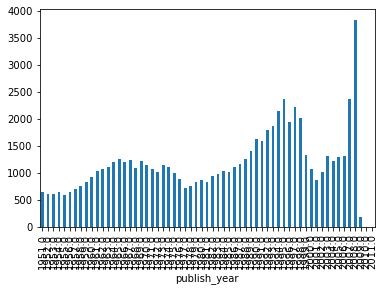

In [1093]:
Non_null_authors_df.groupby('publish_year')['authors_key'].nunique().plot.bar()

# **Find the number of authors and number of books published per month for years between 1950 and 1970**


In [1097]:
#Find the number of authors and number of books published per month for years between 1950 and 1970
editions_1950_1970_df = editions_df[editions_df['publish_year'] < 1970]

In [1098]:
#create a non null authors subset
editions_1950_1970_df_authors=editions_1950_1970_df.dropna(subset = ['authors_key'])

In [1099]:
#get the aggrgate of authors
editions_1950_1970_df_authors = (editions_1950_1970_df_authors.groupby(['publish_year'])
         .agg({'authors_key': 'nunique'})
      ) 

In [1113]:
#get the average
print(round(editions_1950_1970_df_authors/12))

              authors_key
publish_year             
1951.0               54.0
1952.0               50.0
1953.0               50.0
1954.0               54.0
1955.0               49.0
1956.0               53.0
1957.0               59.0
1958.0               63.0
1959.0               69.0
1960.0               77.0
1961.0               86.0
1962.0               89.0
1963.0               92.0
1964.0              100.0
1965.0              104.0
1966.0              100.0
1967.0              104.0
1968.0               91.0
1969.0              101.0


In [1101]:
#get the aggrgate of books
agg_books_1970 = (editions_1950_1970_df.groupby(['publish_year'])
         .agg({'key': 'nunique'})
      ) 

In [1102]:
#get the average
print(round(agg_books_1970/12))

                key
publish_year       
1951.0         56.0
1952.0         53.0
1953.0         52.0
1954.0         56.0
1955.0         51.0
1956.0         55.0
1957.0         62.0
1958.0         66.0
1959.0         73.0
1960.0         80.0
1961.0         90.0
1962.0         94.0
1963.0         99.0
1964.0        106.0
1965.0        112.0
1966.0        108.0
1967.0        110.0
1968.0         97.0
1969.0        107.0
